In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2022-06-21 20:42:49.838439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eren/simulation_ws/devel/lib:/home/eren/catkin_ws/devel/lib:/opt/ros/melodic/lib
2022-06-21 20:42:49.838458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(tf.__version__)

2.9.1


In [3]:
new_model = tf.keras.models.load_model(r'/home/eren/drowsiness/finalModel.h5')


2022-06-21 20:42:51.969620: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eren/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/home/eren/simulation_ws/devel/lib:/home/eren/catkin_ws/devel/lib:/opt/ros/melodic/lib
2022-06-21 20:42:51.969653: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-21 20:42:51.969710: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (erenkaradag): /proc/driver/nvidia/version does not exist
2022-06-21 20:42:51.969955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

# Creating the Frames for the eyes and Try It on the Different Pictures That Is Not In The Dataset

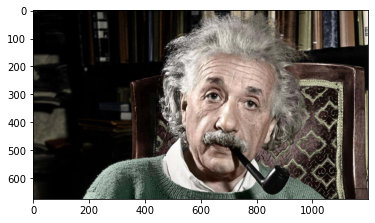

In [4]:
img = cv2.imread(r'/home/eren/drowsiness/einstein.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

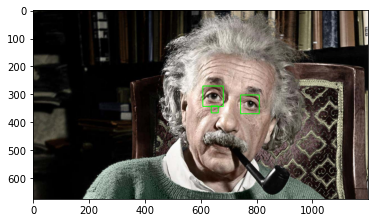

In [5]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Subtract The Eyes From The Image
#additional code is needed for cropping the eyes

(1, 224, 224, 3)

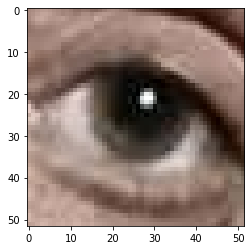

In [6]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes= eye_cascade.detectMultiScale(gray, 1.1,4)


for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected!")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex + ew]        
                
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

eyes_roi.shape

final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

final_image.shape

In [7]:
new_model.predict(final_image)

1/1 [==============================] - 0s 397ms/step


array([[0.9078375]], dtype=float32)

# Real-Time Video Demo

In [8]:
#Alarm is set
from pygame import mixer

mixer.init()

sound= mixer.Sound('/home/eren/drowsiness/alarm.wav')

import numpy as np
import cv2
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(-1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
counter = 0
while True:
    ret,frame = cap.read()
    height,width = frame.shape[0:2]
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4, minSize=(60, 60))
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex +ew]
                
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(faceCascade.empty())
        faces = faceCascade.detectMultiScale(gray, 1.1, 4)
        
        #Draw rectangle around the faces
        for(x, y, w, h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
            
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        #Inserting the text on the video
        
        final_image = cv2.resize(eyes_roi, (224,224))
        final_image = np.expand_dims(final_image, axis = 0) #4th dimension is needed
        final_image = final_image/255.0
        
        Predictions = new_model.predict(final_image)
        
        print(Predictions)
        print(counter)
        #cv2.rectangle(frame, (0,height-90),(200,height),(0,0,0),thickness=cv2.FILLED)
        cv2.putText(frame,'parameter:'+str(counter),(10,height-50),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255,255,255),
                       thickness=1,lineType=cv2.LINE_AA)
        if(Predictions>0.57):
            counter = counter - 3
            status = "Open Eyes"
            cv2.putText(frame, status, (110,150), font, 3, (255, 0, 0), 2, cv2.LINE_AA)
            cv2.putText(frame,"Active",(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(255, 0, 0),
                       thickness=1,lineType=cv2.LINE_AA) 
            if (counter<0):
                counter=0
            
            
        elif(Predictions)<0.47:            
            counter = counter + 2
            status = "Closed Eyes"
            cv2.putText(frame, status, (110,150), font, 3, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255), 2)
            if counter > 16:
                cv2.putText(frame,"WARNING:Drowsiness Detect!",(10,height-20),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=1,color=(0, 0, 255),
                       thickness=1,lineType=cv2.LINE_AA)
                try:
                    sound.play()
                except:
                    pass
                
            # if counter > 25:   try: "uygulayıcılarla direksiyonu ve koltuğu titret"  (sonrası için)          
        
        cv2.imshow("EHB 420E-Drowsiness Detection Project", frame)
        
        if cv2.waitKey(2) & 0xFF ==ord("q"):
            break
cap.release()
cv2.destroyAllWindows()

pygame 2.1.2 (SDL 2.0.16, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
False
1/1 [==============================] - 0s 26ms/step
[[0.61270785]]
0
False
1/1 [==============================] - 0s 37ms/step
[[0.6508749]]
0


QObject::moveToThread: Current thread (0x558bfd19d730) is not the object's thread (0x558bfd0cbf80).
Cannot move to target thread (0x558bfd19d730)

QObject::moveToThread: Current thread (0x558bfd19d730) is not the object's thread (0x558bfd0cbf80).
Cannot move to target thread (0x558bfd19d730)

QObject::moveToThread: Current thread (0x558bfd19d730) is not the object's thread (0x558bfd0cbf80).
Cannot move to target thread (0x558bfd19d730)

QObject::moveToThread: Current thread (0x558bfd19d730) is not the object's thread (0x558bfd0cbf80).
Cannot move to target thread (0x558bfd19d730)

QObject::moveToThread: Current thread (0x558bfd19d730) is not the object's thread (0x558bfd0cbf80).
Cannot move to target thread (0x558bfd19d730)

QObject::moveToThread: Current thread (0x558bfd19d730) is not the object's thread (0x558bfd0cbf80).
Cannot move to target thread (0x558bfd19d730)

QObject::moveToThread: Current thread (0x558bfd19d730) is not the object's thread (0x558bfd0cbf80).
Cannot move to tar

False
1/1 [==============================] - 0s 39ms/step
[[0.66386]]
0
False
1/1 [==============================] - 0s 27ms/step
[[0.5790863]]
0
False
1/1 [==============================] - 0s 36ms/step
[[0.54580814]]
0
False
1/1 [==============================] - 0s 38ms/step
[[0.7532984]]
0
False
1/1 [==============================] - 0s 39ms/step
[[0.57121205]]
0
False
1/1 [==============================] - 0s 27ms/step
[[0.5705984]]
0
False
1/1 [==============================] - 0s 24ms/step
[[0.5702684]]
0
False
1/1 [==============================] - 0s 24ms/step
[[0.56981367]]
0
False
1/1 [==============================] - 0s 24ms/step
[[0.60131025]]
0
False
1/1 [==============================] - 0s 25ms/step
[[0.6139648]]
0
False
1/1 [==============================] - 0s 24ms/step
[[0.49433607]]
0
False
1/1 [==============================] - 0s 25ms/step
[[0.6879855]]
0
False
1/1 [==============================] - 0s 24ms/step
[[0.5620293]]
0
False
1/1 [========================

[[0.49131235]]
0
False
1/1 [==============================] - 0s 35ms/step
[[0.5858152]]
0
False
1/1 [==============================] - 0s 33ms/step
[[0.54922944]]
0
False
1/1 [==============================] - 0s 27ms/step
[[0.6517907]]
0
False
1/1 [==============================] - 0s 37ms/step
[[0.541894]]
0
False
1/1 [==============================] - 0s 38ms/step
[[0.59103936]]
0
False
1/1 [==============================] - 0s 26ms/step
[[0.618771]]
0
False
1/1 [==============================] - 0s 37ms/step
[[0.6352949]]
0
False
1/1 [==============================] - 0s 36ms/step
[[0.4653321]]
0
False
1/1 [==============================] - 0s 38ms/step
[[0.56496745]]
2
False
1/1 [==============================] - 0s 37ms/step
[[0.4976548]]
2
False
1/1 [==============================] - 0s 36ms/step
[[0.5089307]]
2
False
1/1 [==============================] - 0s 36ms/step
[[0.6099694]]
2
False
1/1 [==============================] - 0s 39ms/step
[[0.53736347]]
0
False
1/1 [========

1/1 [==============================] - 0s 34ms/step
[[0.5685292]]
0
False
1/1 [==============================] - 0s 33ms/step
[[0.6170586]]
0
False
1/1 [==============================] - 0s 26ms/step
[[0.6178654]]
0
False
1/1 [==============================] - 0s 27ms/step
[[0.70783746]]
0
False
1/1 [==============================] - 0s 34ms/step
[[0.61141497]]
0
False
1/1 [==============================] - 0s 25ms/step
[[0.6916686]]
0
False
1/1 [==============================] - 0s 33ms/step
[[0.5860788]]
0
False


KeyboardInterrupt: 